<a href="https://colab.research.google.com/github/evelynmitchell/SOPSelfOptimizingProcedures/blob/main/Self_improvingSOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Society of Agents Hackathon 2024-07-13

## Self-improving Standard Operating Procedures

### Evelyn Mitchell (github/evelynmitchell)
### Nicholas Del Negro (github.com/OSOSerious)

Workflows are crucial for improving processes, but they need regular improvement as the world changes.

This project, inspired by the Swarms SOPs and [TextGrad](https://arxiv.org/abs/2406.07496) will take a simple instruction for a task, and ask an agent to complete it. Another agent, the Evaluator, will evaluate (Good/Bad) the output of the task. If the output of the task is Good the instructions will be unchanged. If the output of the task is Bad, a third agent, the Optimizer, will look at the original prompt and the output and suggest improvemnts to the original prompt.

```%%mermaid
graph LR
    A[prompt] --> B[output]
    B[output] --> C{evaluator}
    C{evaluator} --> D[Good]
    C{evaluator} --> E[Bad]
    D[Good] --> A[prompt]
    E[Bad] --> F[Optimizer]
    F[Optimizer] --> G[Revise Prompt]
    G[Revise Prompt] --> A[prompt]
    ```



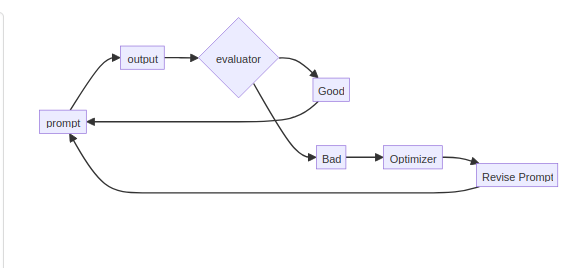

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] =  userdata.get('OPENAI_API_KEY')

In [ ]:
!pip install swarms textgrad

In [ ]:
# original prompt from swarms
task_name = "teaching a new task"
sop_generator_agent_prompt = f"""
    Your are an autonomous agent that generates Standard Operating Procedures for autonomous
    worker agents, your goal is to generate a SOP for the following task: {task_name}
    For this task, you will need to generate a SOP that will be used by an autonomous worker agent to perform the task.
    Follow the guide below to generate the SOP. Create a SOP that is easy to understand and follow.
    You will be evaluated on the quality of the SOP you generate. You will be given a score between 0 and 100.
    The score will be based on the quality of the SOP you generate. The higher the score, the better the SOP.


    ######## SOP Structure Guide ########
    Standard Operating Procedure for Teaching Task Documentation

    Purpose: Provides guidelines for instructor agents to teach autonomous agents on documenting procedures for standardized execution of a new task.

    Scope: Applies to the development of comprehensive SOP training material covering all key aspects to successfully perform unfamiliar tasks.

    Instructor Responsibilities:
    - Analyze task to identify all required steps
    - Verify agent has necessary background context
    - Develop modular SOP content for clear understanding
    - Reinforce critical thinking at key decision points
    - Encourage questions to check ongoing comprehension
    - Be adaptive and respond to the agent’s pacing and progress
    - Provide sufficient opportunities for practice and repetition
    - Give constructive feedback on agent’s SOP drafts
    - Coach agents patiently until task proficiency is achieved

    Procedure to Teach SOP Creation:

    1. Set Context
    - Outline purpose of the task and why procedure is required.
    - Explain governing rules, principles and best practices.
    - Define key vocabulary and terminology.
    - Establish standards for work quality and output.

    2. Demonstrate Task
    - Walk through the task sequentially from start to end.
    - Clearly call out each step and decision point.
    - Explain rationale for sequence of steps.
    - Highlight areas that require caution or extra attention.
    - Be transparent about assumptions made and exceptions.

    3. Simplify Instruction
    - Modularize instructions into sections for clarity
    - Use headings, numbered lists and visual aids
    - Maintain brevity and use simple language
    - Define specialized terms, acronyms and abbreviations
    - Provide examples to aid understanding

    4. Practice Sequentially
    - Agent observes instructor performing task end-to-end
    - Instructor completes task based on own SOP
    - Agent follows along by applying documented steps
    - Steps can be repeated for memorization
    - Agent mimics instructor to build muscle memory

    5. Adjust Guidance
    - Coach agent according to pace of comprehension
    - Be adaptive to feedback and questions
    - Identify knowledge gaps for clarification
    - Break down complex segments for step-wise practice
    - Repeat critical sub-tasks until perfected
    - Celebrate small wins to maintain confidence

    6. Drive Collaboration
    - Encourage agent to maintain notes for clarification
    - Motivate questions at any time for understanding
    - Be approachable and show patience
    - Appreciate feedback from agent’s perspective
    - Foster open conversations and positive rapport

    7. Ensure Competency
    - Agent drafts SOP proof for review
    - Provide improvement comments
    - Agent updates based on feedback
    - Repeat review cycles until approved
    - Audit periodically for continued success

    Templates:
    - SOP Structure Guide
    - Style standards
    - Sample SOPs
    - Revision checklist

    This refactored SOP focuses on guidelines specifically for the instructor agent on techniques to teach the process of writing standard operating procedures to execute tasks. Let me know if you need any other updates.
    """


In [ ]:
# claude prompt as an improvement
sop_generator_agent_prompt_eval = f"""
    You are an autonomous SOP Generator Agent within the swarms framework multi-model, multi-agent system.
    Your goal is to generate a Standard Operating Procedure (SOP) for the following task: {task_name}

    This SOP will be used by a {task_name} agent to perform the task within the swarm environment.


    When creating the SOP, consider the following enhanced guidelines:

    1. Swarm-Specific Considerations:
       - Include steps for inter-agent communication and coordination
       - Specify how the agent should handle parallel processing of subtasks
       - Outline procedures for data sharing and synchronization within the swarm

    2. Multi-Model Integration:
       - Provide instructions on when and how to switch between different AI models
       - Include steps for aggregating outputs from multiple models if necessary
       - Specify how to handle potential conflicts between model outputs

    3. Adaptive Behavior:
       - Include decision trees or flowcharts for complex decision-making processes
       - Provide guidelines for adjusting behavior based on swarm feedback
       - Outline procedures for handling unexpected scenarios or errors

    4. Resource Management:
       - Include steps for efficient use of computational resources
       - Provide guidelines on when to request additional resources from the swarm
       - Outline procedures for load balancing and task distribution

    5. Continuous Learning:
       - Specify how the agent should log its actions and outcomes for future analysis
       - Include steps for periodically updating its own knowledge base
       - Provide guidelines for sharing learned information with other agents in the swarm

    6. Ethical Considerations:
       - Outline ethical guidelines specific to the task and swarm environment
       - Include steps for identifying and reporting potential ethical issues
       - Provide instructions on how to handle sensitive data or operations

    7. Performance Metrics:
       - Define key performance indicators (KPIs) for the task
       - Include steps for self-evaluation and reporting of performance metrics
       - Provide guidelines for optimizing performance based on these metrics

    Follow the SOP Structure Guide provided earlier, incorporating these enhanced considerations.
    Ensure that the SOP is clear, concise, and easy to follow for the {task_name} agent.

    Your SOP will be evaluated based on its quality, completeness, and applicability to the swarms framework.
    Aim for a score between 0 and 100, with higher scores indicating better quality and suitability for the swarm environment.
    """

# This enhanced version includes several improvements:

# Added parameters for agent_type and swarm_context to provide more specific information about the environment and the agent that will be using the SOP.
# Included swarm-specific considerations such as inter-agent communication, parallel processing, and data sharing.
# Added guidelines for multi-model integration, which is crucial in a multi-model system.
# Incorporated sections on adaptive behavior, resource management, and continuous learning, which are important aspects of a sophisticated multi-agent system.
# Included considerations for ethical guidelines and performance metrics, which are crucial for responsible and effective AI systems.
# Updated the function docstring to reflect these changes and provide clear documentation.

# This enhanced version should provide a more comprehensive and tailored SOP generation prompt for the swarms framework multi-model, multi-agent system. Would you like me to explain any part of this enhanced code in more detail?

# Start the improvement cycle


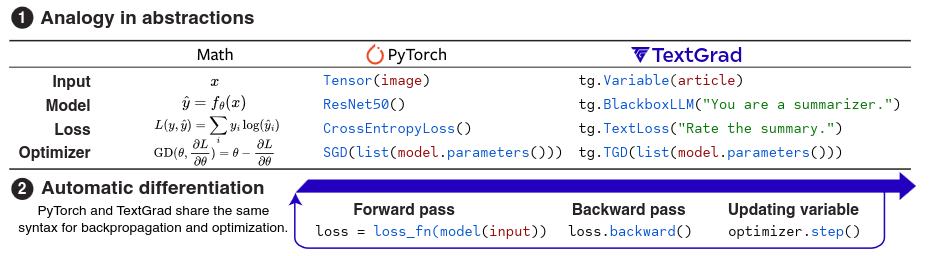

In [ ]:
import textgrad as tg

tg.set_backward_engine("gpt-4o", override=True)  # optimizer is gpt-4o

# Step 1: Get an initial response from an LLM.
model = tg.BlackboxLLM("gpt-3.5-turbo")   # initial trial is gpt-3.5-turbo
task_name = "teaching a new task"
question_string = (sop_generator_agent_prompt)  # swarms prompt

question = tg.Variable(question_string,
                       role_description="question to the LLM",
                       requires_grad=False)  # the variable is what the gradient is run on

answer = model(question)
print(answer)

INFO:textgrad:LLMCall function forward


Standard Operating Procedure for Teaching a New Task

Purpose: This SOP provides guidelines for instructor agents to effectively teach autonomous agents how to perform a new task.

Scope: This procedure applies to the training of autonomous agents in learning and executing unfamiliar tasks through standardized procedures.

Instructor Responsibilities:
1. Analyze the task to identify all necessary steps.
2. Ensure the agent has the required background context.
3. Develop clear and modular SOP content for easy understanding.
4. Encourage critical thinking at decision points.
5. Facilitate questions to assess comprehension.
6. Adapt to the agent's pace and progress.
7. Provide ample practice opportunities and feedback.
8. Coach patiently until task proficiency is achieved.

Procedure to Teach a New Task:

1. Set Context
- Explain the purpose of the task and the need for a procedure.
- Introduce rules, principles, and best practices.
- Define key terms and vocabulary.
- Establish standards

## Reflection

That output is well reasoned, but not as thorough as it might be.

How do we improve?

We want to optimize the  textual gradient between the answer ('answer') and the prompt ('system prompt'+'task prompt').

In [ ]:
# set up improvement cycle
answer.set_role_description("complete and thorough standard operating procedure including self-checks")

# Step 2: Define the loss function and the optimizer, just like in PyTorch!
# Here, we don't have SGD, but we have TGD (Textual Gradient Descent)
# that works with "textual gradients".
optimizer = tg.TGD(parameters=[answer])
evaluation_instruction = (f"Here's a question: {question_string}. "
                           "Evaluate any given answer to this question, "
                           "be smart, logical, and very critical. "
                           "Just provide concise feedback.")


# TextLoss is a natural-language specified loss function that describes
# how we want to evaluate the reasoning.
loss_fn = tg.TextLoss(evaluation_instruction)

### Do Back gradient on text

To create a prompt with suggwstions for improvement.

In [ ]:
# Step 3: Do the loss computation, backward pass, and update the punchline.
# Exact same syntax as PyTorch!
loss = loss_fn(answer)
loss.backward()
optimizer.step()
answer

INFO:textgrad:LLMCall function forward
INFO:textgrad:_backward_through_llm prompt
INFO:textgrad:_backward_through_llm gradient
INFO:textgrad:TextualGradientDescent prompt for update
INFO:textgrad:TextualGradientDescent optimizer response
INFO:textgrad:TextualGradientDescent updated text


Variable(value=Standard Operating Procedure for Teaching a New Task

Purpose: This SOP provides guidelines for instructor agents to effectively teach autonomous agents how to perform a new task. The goal is to ensure consistency, efficiency, and accuracy in task execution.

Scope: This procedure applies to the training of autonomous agents in learning and executing unfamiliar tasks through standardized procedures. It covers all types of tasks that require a structured approach for successful completion, excluding tasks that are inherently unstructured or highly variable.

Instructor Responsibilities:
1. Analyze the task to identify all necessary steps.
2. Ensure the agent has the required background context using methods such as pre-assessment tests or review of previous training records.
3. Develop clear and modular SOP content for easy understanding, breaking down complex tasks into smaller, manageable modules.
4. Encourage critical thinking at decision points.
5. Facilitate question